In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [37]:
design_path = 'PD-L1_designs_uncond_composite.csv'
designs = pd.read_csv(design_path)
designs['design_info'] = designs['design_info'].str.split(',').str[0].str.split(':').str[-1].str.strip()
designs.head()

,Design,ppi-pred,ppi-probability,predicted-pKd,design_info,esm_pll_total,esm_pll_averaged,esmfold_plddt,composite_score
0,SAEEKILANLEAMKAKALAAKTEEEKLFYAKALLAVAISAAIRGKS...,1,0.9459,9.6482,0.08,-200.101301,-1.667511,0.786973,4.307077
1,EKLFYAKALLAVAISYAIRGDYHLARRAAELAMEVIKELEKEEQKK...,1,0.9950,9.7035,0.1,-172.054239,-1.830364,0.793538,4.185833
2,EKLFYAKALLAVAISYAIRGDYILARRAAELAVEVIKSLSKEEQKK...,1,0.9725,9.6327,0.02,-175.264152,-1.844886,0.795958,4.041648
3,SAEEKIDAILEAMKSKALAAKTEEEKLFYLKALLAVAISYSIRGRY...,1,0.9664,9.6953,0.11,-220.733522,-1.839446,0.791800,4.033171
4,SEEEKILANLEAMKAKAEAAKTEEEKLFYAKALLAVAISYAIRGKY...,1,0.9180,9.6753,0.03,-210.772389,-1.756437,0.788435,3.986948


In [38]:
pdl1 = pd.read_csv('pdl1.csv')
print(len(pdl1))
names = pdl1['name']
seqs = pdl1['sequence']
# drop non numeric columns
pdl1 = pdl1.select_dtypes(include=[np.number])
pdl1['name'] = names
pdl1 = pdl1.drop(columns=['replicate'])
# average the rows that share the name column
pdl1 = pdl1.groupby('name').mean().reset_index()
pdl1['sequence'] = seqs
print(len(pdl1))
pdl1.head()


40
20


,name,kd,kon,koff,sequence
0,dsm_pdl1_1,NaN,NaN,NaN,SSNEKILENLEAMKAKALAAKTEEEKLFYAKALLAVAISYSIRGEY...
1,dsm_pdl1_10,NaN,NaN,NaN,SSNEKILENLEAMKAKALAAKTEEEKLFYAKALLAVAISYSIRGEY...
2,dsm_pdl1_11,2.120000e-07,35179.01069,0.007454,SAEEKALANLEAMKAKALAAKNEEEKLFYARAYFAVATSYAIRGDY...
3,dsm_pdl1_12,7.435000e-07,52832.79753,0.038969,SAEEKALANLEAMKAKALAAKNEEEKLFYARAYFAVATSYAIRGDY...
4,dsm_pdl1_13,8.005000e-07,363653.20990,0.290443,SEEEKILANLEAMKAKAEAAKTEEEKLFYAKALLAVAISYAIRGKY...


In [39]:
pdl1['pkd'] = -np.log10(pdl1['kd'])
# sort by pkd, largest at top
pdl1 = pdl1.sort_values(by='pkd', ascending=False)
pdl1.head()

,name,kd,kon,koff,sequence,pkd
17,dsm_pdl1_7,8.060000e-09,64293.962365,0.000518,SAEEKILANLEAMKAKALEAKTEEEKLFYAKALLAVAISYAIIGDY...,8.093665
16,dsm_pdl1_6,1.485000e-08,144160.706050,0.002116,SAEEKIDAILEAMKSKALAAKTEEEKLFYLKALLAVAISYSIRGRY...,7.828274
11,dsm_pdl1_2,3.230000e-08,169942.384650,0.005347,SAEEKILANLEAMLAKAEAAKTEEEKLFYAKALLAVAISYEIRGIY...,7.490797
7,dsm_pdl1_16,9.285000e-08,101465.640930,0.009413,SAEEKILANLKAMKAKALAAKTEEEKLFYAKALHAVAISYAIKGDY...,7.032218
14,dsm_pdl1_4,1.615000e-07,65419.358515,0.010431,SAEEKILANLEAMKAKALAAKTEEEKLFYAKALLAVAISYAIRGKY...,6.791827


In [41]:
# map sequence to info in designs df
# columns ppi-probability, predicted-pkd, design_info, esm_pll_averaged, esmfold_plddt, composite_score
# for design info, we need to apply .split(',')[0].split(':')[-1].strip()

# Create a mapping dictionary from designs dataframe
design_mapping = {}
for idx, row in designs.iterrows():
    seq = row['Design']
    design_mapping[seq] = {
        'ppi-probability': row['ppi-probability'],
        'predicted-pkd': row['predicted-pKd'],
        'design_info': row['design_info'],
        'esm_pll_averaged': row['esm_pll_averaged'],
        'esmfold_plddt': row['esmfold_plddt'],
        'composite_score': row['composite_score']
    }

print(len(design_mapping))

# Add new columns to pdl1 dataframe
pdl1['ppi-probability'] = pdl1['sequence'].map(lambda x: design_mapping.get(x, {}).get('ppi-probability', np.nan))
pdl1['predicted-pkd'] = pdl1['sequence'].map(lambda x: design_mapping.get(x, {}).get('predicted-pkd', np.nan))
pdl1['mask-rate'] = pdl1['sequence'].map(lambda x: design_mapping.get(x, {}).get('design_info', np.nan))
pdl1['esm_pll_averaged'] = pdl1['sequence'].map(lambda x: design_mapping.get(x, {}).get('esm_pll_averaged', np.nan))
pdl1['esmfold_plddt'] = pdl1['sequence'].map(lambda x: design_mapping.get(x, {}).get('esmfold_plddt', np.nan))
pdl1['composite_score'] = pdl1['sequence'].map(lambda x: design_mapping.get(x, {}).get('composite_score', np.nan))
# Display the updated dataframe
pdl1.head()

1000


,name,kd,kon,koff,sequence,pkd,ppi-probability,predicted-pkd,mask-rate,esm_pll_averaged,esmfold_plddt,composite_score
17,dsm_pdl1_7,8.060000e-09,64293.962365,0.000518,SAEEKILANLEAMKAKALEAKTEEEKLFYAKALLAVAISYAIIGDY...,8.093665,0.8812,9.6303,0.05,-1.826550,0.780412,3.625821
16,dsm_pdl1_6,1.485000e-08,144160.706050,0.002116,SAEEKIDAILEAMKSKALAAKTEEEKLFYLKALLAVAISYSIRGRY...,7.828274,0.9664,9.6953,0.11,-1.839446,0.791800,4.033171
11,dsm_pdl1_2,3.230000e-08,169942.384650,0.005347,SAEEKILANLEAMLAKAEAAKTEEEKLFYAKALLAVAISYEIRGIY...,7.490797,0.9715,9.6816,0.13,-1.853211,0.785366,3.985998
7,dsm_pdl1_16,9.285000e-08,101465.640930,0.009413,SAEEKILANLKAMKAKALAAKTEEEKLFYAKALHAVAISYAIKGDY...,7.032218,0.9361,9.6292,0.09,-1.790824,0.778754,3.919765
14,dsm_pdl1_4,1.615000e-07,65419.358515,0.010431,SAEEKILANLEAMKAKALAAKTEEEKLFYAKALLAVAISYAIRGKY...,6.791827,0.7828,9.7438,0.09,-1.685962,0.775256,3.507328


In [45]:
# manually add template

template = {
    'name': 'template',
    'sequence': 'SAEEKILANLEAMKAKALAAKTEEEKLFYAKALLAVAISYAIRGDYELARRAAELAVEVIKSLSKEEQKKVMDFLINIIKNITDPEDREKAIELAIAIAERLDEEVREEALKKIEELKKE',
    'ppi-probability': 0.1986,
    'predicted-pkd': 9.1547,
    'pkd': 10.3757,
    'mask-rate': 0.0
}

pdl1 = pd.concat([pdl1, pd.DataFrame([template])], ignore_index=True)
pdl1.head()

,name,kd,kon,koff,sequence,pkd,ppi-probability,predicted-pkd,mask-rate,esm_pll_averaged,esmfold_plddt,composite_score
0,dsm_pdl1_7,8.060000e-09,64293.962365,0.000518,SAEEKILANLEAMKAKALEAKTEEEKLFYAKALLAVAISYAIIGDY...,8.093665,0.8812,9.6303,0.05,-1.826550,0.780412,3.625821
1,dsm_pdl1_6,1.485000e-08,144160.706050,0.002116,SAEEKIDAILEAMKSKALAAKTEEEKLFYLKALLAVAISYSIRGRY...,7.828274,0.9664,9.6953,0.11,-1.839446,0.791800,4.033171
2,dsm_pdl1_2,3.230000e-08,169942.384650,0.005347,SAEEKILANLEAMLAKAEAAKTEEEKLFYAKALLAVAISYEIRGIY...,7.490797,0.9715,9.6816,0.13,-1.853211,0.785366,3.985998
3,dsm_pdl1_16,9.285000e-08,101465.640930,0.009413,SAEEKILANLKAMKAKALAAKTEEEKLFYAKALHAVAISYAIKGDY...,7.032218,0.9361,9.6292,0.09,-1.790824,0.778754,3.919765
4,dsm_pdl1_4,1.615000e-07,65419.358515,0.010431,SAEEKILANLEAMKAKALAAKTEEEKLFYAKALLAVAISYAIRGKY...,6.791827,0.7828,9.7438,0.09,-1.685962,0.775256,3.507328


In [46]:
pdl1.to_csv('pdl1_with_designs.csv', index=False)

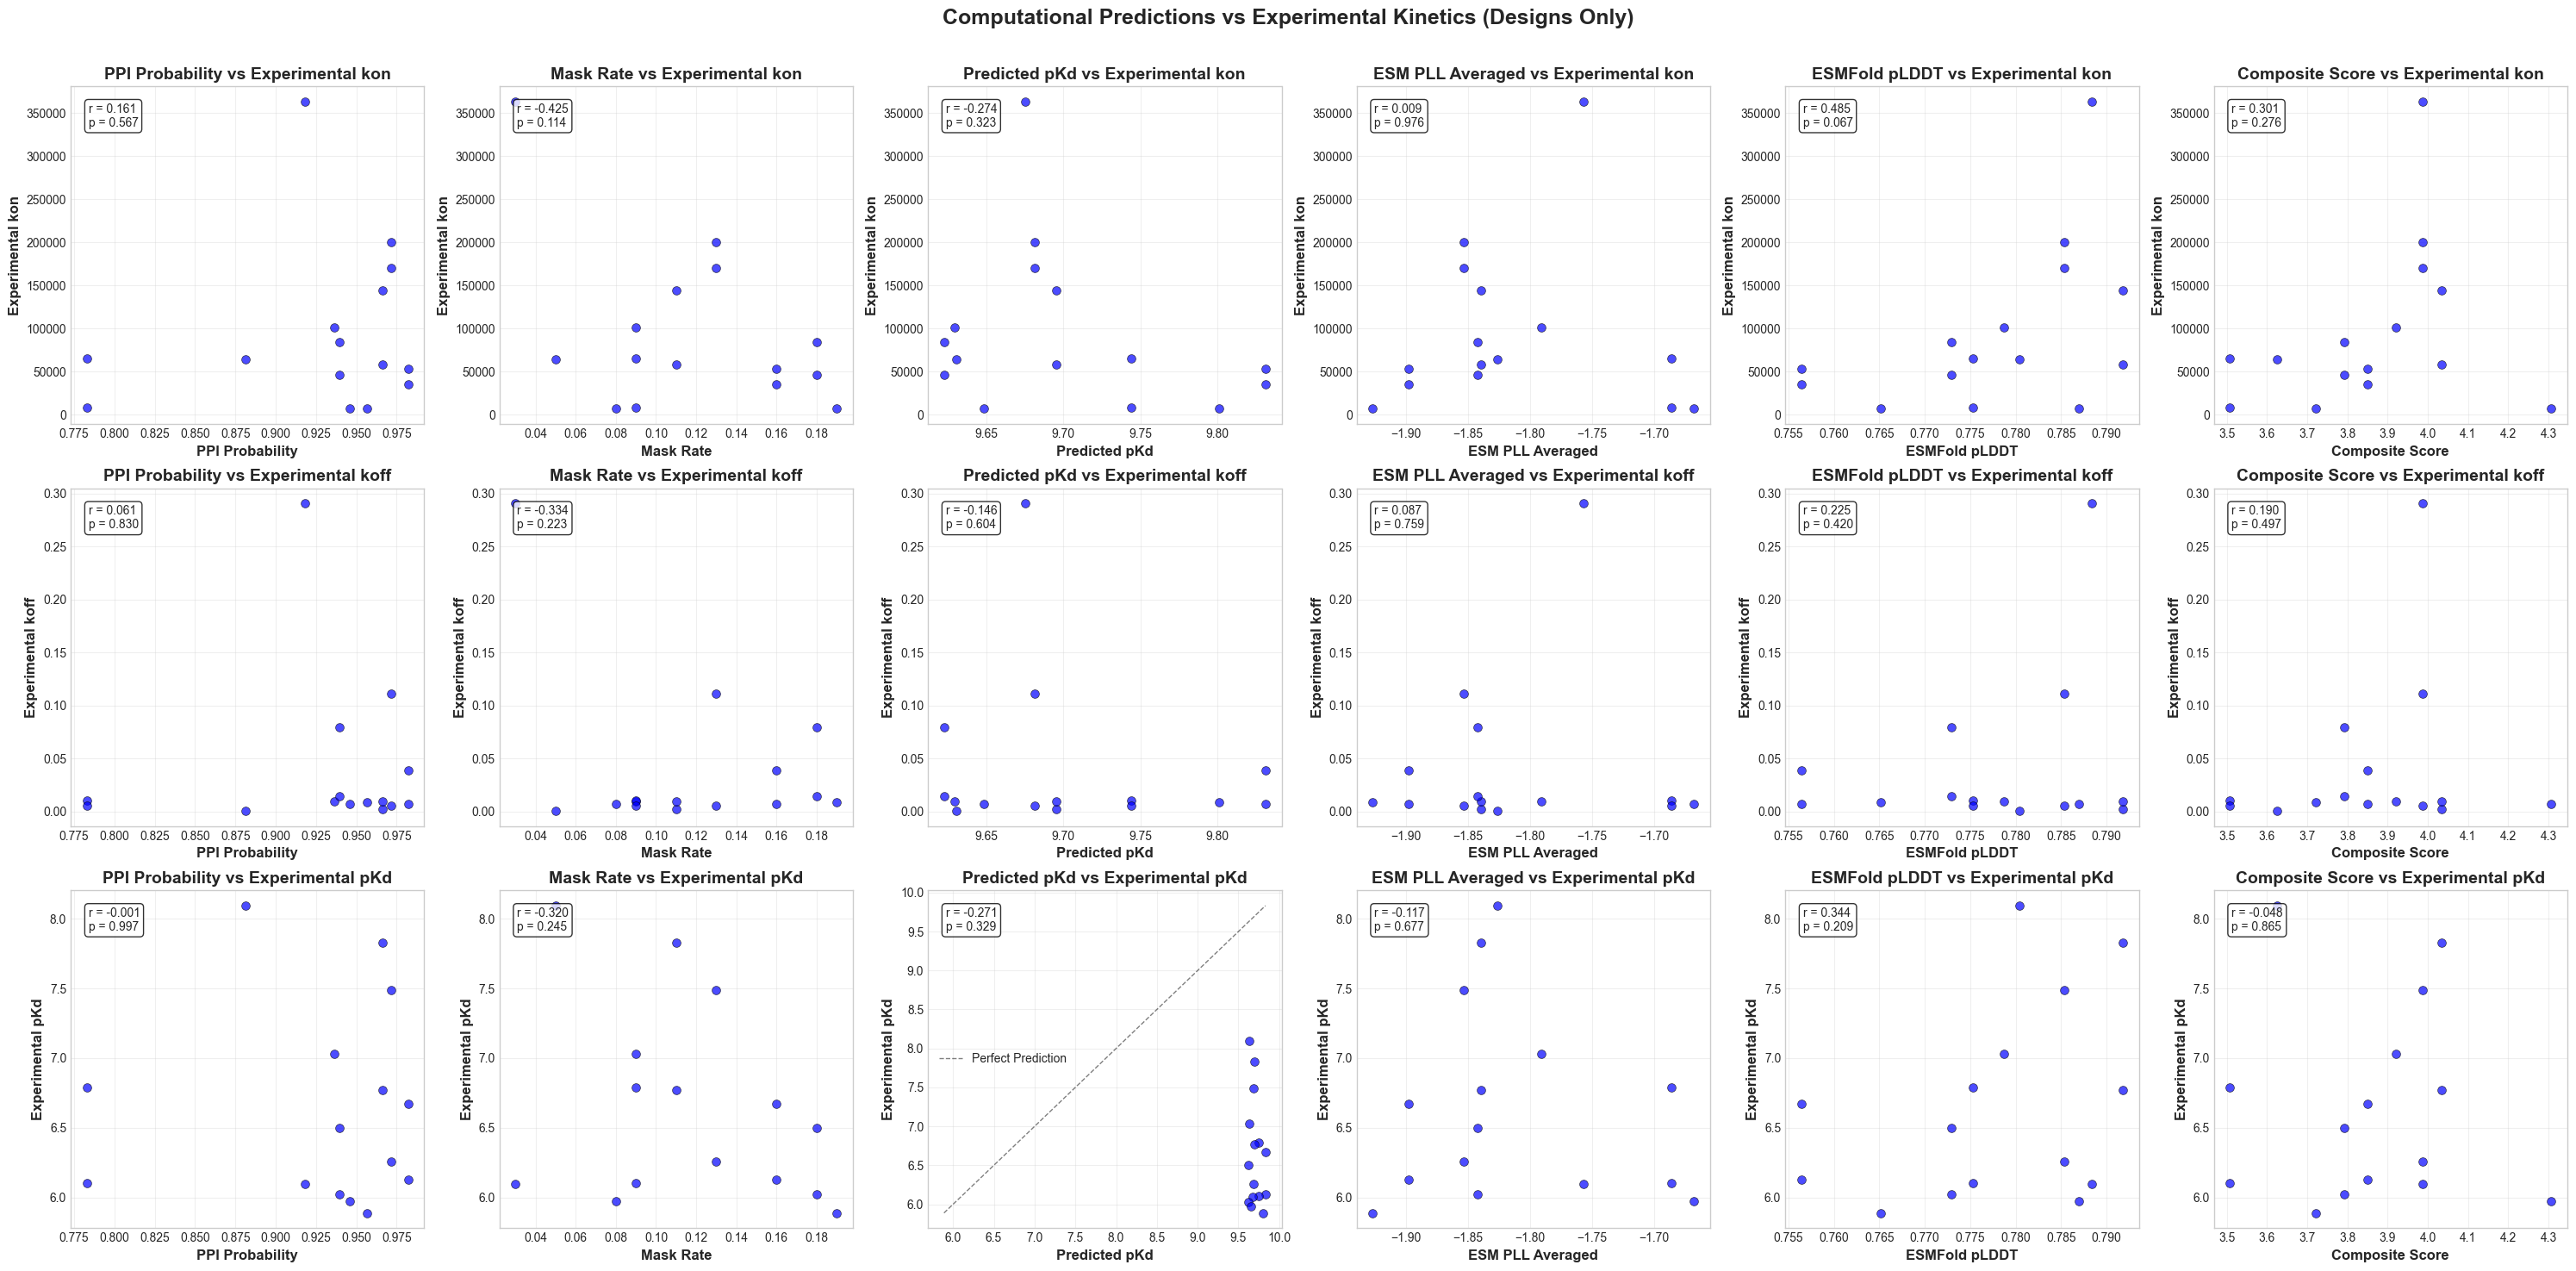

Summary Statistics (Designs Only):
Number of sequences with experimental data: 15
Experimental pKd range: 5.89 - 8.09
Experimental kon range: 6.61e+03 - 3.64e+05
Experimental koff range: 5.18e-04 - 2.90e-01
PPI Probability range: 0.7828 - 0.9822
Mask Rate range: 0.0300 - 0.1900
Predicted pKd range: 9.6225 - 9.8311
ESM PLL Averaged range: -1.9270 - -1.6675
ESMFold pLDDT range: 0.7564 - 0.7918
Composite Score range: 3.5073 - 4.3071

Correlation coefficients (r, p):
PPI Probability vs Experimental kon: r = 0.161, p = 0.567
Mask Rate vs Experimental kon: r = -0.425, p = 0.114
Predicted pKd vs Experimental kon: r = -0.274, p = 0.323
ESM PLL Averaged vs Experimental kon: r = 0.009, p = 0.976
ESMFold pLDDT vs Experimental kon: r = 0.485, p = 0.067
Composite Score vs Experimental kon: r = 0.301, p = 0.276
PPI Probability vs Experimental koff: r = 0.061, p = 0.830
Mask Rate vs Experimental koff: r = -0.334, p = 0.223
Predicted pKd vs Experimental koff: r = -0.146, p = 0.604
ESM PLL Averaged vs 

In [ ]:
### Plots: ignore template, simplify, add more columns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Columns to include in analysis
cols = [
    'pkd', 'ppi-probability', 'predicted-pkd', 'mask-rate',
    'esm_pll_averaged', 'esmfold_plddt', 'composite_score'
]

# Ensure numeric and drop rows with missing values in any of the columns of interest
for col in cols + ['kon', 'koff']:
    pdl1[col] = pd.to_numeric(pdl1[col], errors='coerce')

# Exclude template from analysis
plot_data = pdl1[(pdl1['name'] != 'template')].dropna(subset=cols + ['kon', 'koff']).copy()

# Plot settings
plot_pairs = [
    ('ppi-probability', 'PPI Probability'),
    ('mask-rate', 'Mask Rate'),
    ('predicted-pkd', 'Predicted pKd'),
    ('esm_pll_averaged', 'ESM PLL Averaged'),
    ('esmfold_plddt', 'ESMFold pLDDT'),
    ('composite_score', 'Composite Score')
]

n_rows = 3
n_cols = 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
fig.suptitle('Computational Predictions vs Experimental Kinetics (Designs Only)', fontsize=18, fontweight='bold')

# Prepare y-axis variables and their labels
ycols = [
    ('kon', 'Experimental kon'),
    ('koff', 'Experimental koff'),
    ('pkd', 'Experimental pKd')
]

for row_idx, (ycol, ylabel) in enumerate(ycols):
    for col_idx, (xcol, xlabel) in enumerate(plot_pairs):
        ax = axes[row_idx, col_idx]
        ax.scatter(plot_data[xcol], plot_data[ycol], c='blue', s=50, alpha=0.7, edgecolors='black', linewidth=0.5)
        ax.set_xlabel(xlabel, fontsize=12, fontweight='bold')
        ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
        ax.set_title(f'{xlabel} vs {ylabel}', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        # Add diagonal for predicted-pkd vs pkd
        if xcol == 'predicted-pkd' and ycol == 'pkd':
            min_val = min(plot_data[xcol].min(), plot_data[ycol].min())
            max_val = max(plot_data[xcol].max(), plot_data[ycol].max())
            ax.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.5, linewidth=1, label='Perfect Prediction')
            ax.legend()
        # Add correlation
        if len(plot_data) > 2:
            try:
                r, p = stats.pearsonr(plot_data[xcol], plot_data[ycol])
                ax.text(0.05, 0.95, f'r = {r:.3f}\np = {p:.3f}',
                        transform=ax.transAxes, fontsize=10, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            except Exception as e:
                ax.text(0.05, 0.95, f'Error: {e}', transform=ax.transAxes, fontsize=8, verticalalignment='top')

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.savefig('pld1.png', dpi=300)
plt.show()

# Print summary statistics
print("Summary Statistics (Designs Only):")
print(f"Number of sequences with experimental data: {len(plot_data)}")
print(f"Experimental pKd range: {plot_data['pkd'].min():.2f} - {plot_data['pkd'].max():.2f}")
print(f"Experimental kon range: {plot_data['kon'].min():.2e} - {plot_data['kon'].max():.2e}")
print(f"Experimental koff range: {plot_data['koff'].min():.2e} - {plot_data['koff'].max():.2e}")
for xcol, xlabel in plot_pairs:
    print(f"{xlabel} range: {plot_data[xcol].min():.4f} - {plot_data[xcol].max():.4f}")

if len(plot_data) > 2:
    print(f"\nCorrelation coefficients (r, p):")
    for ycol, ylabel in ycols:
        for xcol, xlabel in plot_pairs:
            try:
                r, p = stats.pearsonr(plot_data[xcol], plot_data[ycol])
                print(f"{xlabel} vs {ylabel}: r = {r:.3f}, p = {p:.3f}")
            except Exception as e:
                print(f"{xlabel} vs {ylabel}: Error: {e}")
